In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
#from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv("energydata_complete.csv")

In [3]:
df.columns


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

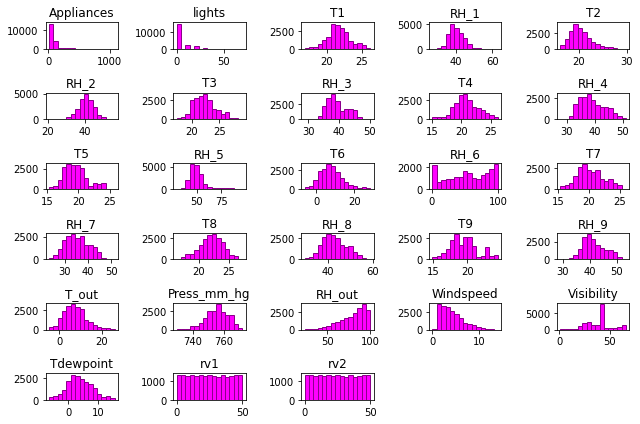

In [4]:
fig = df.hist(bins=15, color='fuchsia', edgecolor='darkmagenta',
linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=0, yrot=0,
grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

In [5]:
df_corr =df.corr()
sorted_val = df_corr['Appliances'].sort_values()
sorted_val

RH_out        -0.152282
RH_8          -0.094039
RH_6          -0.083178
RH_2          -0.060465
RH_7          -0.055642
RH_9          -0.051462
Press_mm_hg   -0.034885
rv1           -0.011145
rv2           -0.011145
Visibility     0.000230
RH_5           0.006955
T9             0.010010
Tdewpoint      0.015353
RH_4           0.016965
T5             0.019760
T7             0.025801
RH_3           0.036292
T8             0.039572
T4             0.040281
T1             0.055447
T3             0.085060
RH_1           0.086031
Windspeed      0.087122
T_out          0.099155
T6             0.117638
T2             0.120073
lights         0.197278
Appliances     1.000000
Name: Appliances, dtype: float64

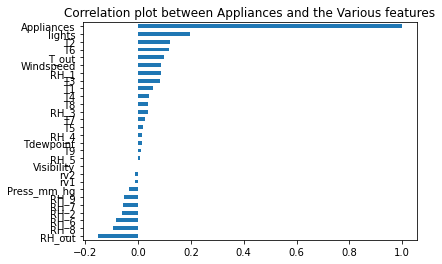

In [6]:
sorted_val.plot(kind='barh')
plt.title('Correlation plot between Appliances and the Various features');

### The following deductions can be made from the above correlation plot
1. All the temperature features are positively correlated with the target column (appliances)
2. The feature visibility has a correlation value of with the target column
3. The features pressure, visibility, tdewpoint, rv1, rv2 have low correlation with the target 
4. The features RH_out, RH_8, RH_6, RH_2, RH_7, RH_9, Press_mm_hg, rv1, rv2 are negatively correlated with the target column
4. Light shows high correlation with the target column

In [8]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## from the above output the following deductions can be made:

1. The maximum energy in wh used by the appliances is 1080wh, minimum is 10wh and average energy used is 97.69wh

2. The maximum pressure recorded is 777.52mmhg, minimum is 772.3mmhg, while the average pressure recorded is 729.3mmhg

3. The maximum temperature recorded outside is 26 degree celsius, while the minimum is -5 degree celsius
3. The maximum temperature was 29.85 degree celsius 
   recorded for T2(Temperature of the living room, showing that the living room is always warm),
   while the minimum temperature was -6.05 degree celsius for T6(temperature outside the building, the north side),showing its cold outside 

4. The maximum windspead recorded is 14m/s, minimum is 0, while average is 4.039m/s

In [9]:
print('skewness of the dataset', df.skew())
print('==='*30)
print('kurtosis of dataset',df.kurt())

skewness of the dataset Appliances     3.386367
lights         2.195155
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534273
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239374
rv1            0.004945
rv2            0.004945
dtype: float64
kurtosis of dataset Appliances     13.667863
lights          4.462147
T1              0.161601
RH_1            0.112629
T2              0.933397
RH_2            0.670959
T3             -0.007055
RH_3           -0.583126
T4             -0.037633
RH_4           -0.613967
T5              0.1

C:\Users\EDET\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
C:\Users\EDET\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [12]:
X_ = np.array(df['T2'])
y_ = np.ravel(df['T6'])

In [13]:
X_ = X_.reshape(-1,1)
y_ = y_.reshape(-1,1)

In [14]:
lr = LinearRegression()
lr.fit(X_,y_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(r2_score(X_,y_))

-35.393237547324794


In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
print(mean_absolute_error(X_,y_))

12.436467205667771


In [20]:
print(np.sqrt(mean_squared_error(X_,y_)))

13.229174131608431


In [21]:
rss = np.sum(np.square(X_,y_))
print(rss)

8260559.834088432


In [22]:
df.drop(['date','lights'],inplace=True,axis=1)

In [24]:
X = np.array(df.drop(['Appliances'],axis=1))
y = np.ravel(df['Appliances'])

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
print(f'the shape of Xtrain is: {X_train.shape}\nthe shape of ytrain is: {y_train.shape}')
print(f'the shape of Xtest is: {X_test.shape}\nthe shape ytest is: {y_test.shape}')      

the shape of Xtrain is: (13814, 26)
the shape of ytrain is: (13814,)
the shape of Xtest is: (5921, 26)
the shape ytest is: (5921,)


In [27]:
MMsc = MinMaxScaler()
X_trainsc = MMsc.fit_transform(X_train)

In [28]:
X_test = MMsc.transform(X_test)

In [29]:
lr = LinearRegression()
lr.fit(X_trainsc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
weight = lr.coef_

Feature: 0, Score: -55.63783
Feature: 1, Score: 491.73276
Feature: 2, Score: -155.89738
Feature: 3, Score: -447.19094
Feature: 4, Score: 318.17759
Feature: 5, Score: 83.67492
Feature: 6, Score: 24.78195
Feature: 7, Score: 35.77042
Feature: 8, Score: -34.35655
Feature: 9, Score: 16.22794
Feature: 10, Score: -16.74380
Feature: 11, Score: 16.65088
Feature: 12, Score: 0.50332
Feature: 13, Score: -45.34770
Feature: 14, Score: 99.62068
Feature: 15, Score: -180.61816
Feature: 16, Score: -183.60687
Feature: 17, Score: -39.16474
Feature: 18, Score: -88.26205
Feature: 19, Score: 2.39025
Feature: 20, Score: -45.57904
Feature: 21, Score: 31.03289
Feature: 22, Score: 13.05699
Feature: 23, Score: 100.60176
Feature: 24, Score: 0.76937
Feature: 25, Score: 0.76937


<BarContainer object of 26 artists>

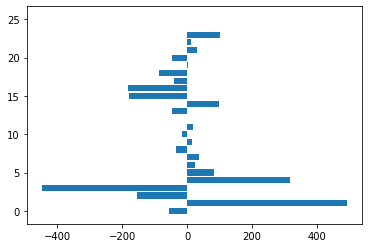

In [33]:
for i,v in enumerate(weight):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.barh([x for x in range(len(weight))], weight)
#plt.show()

In [34]:
rd = Ridge(alpha=0.4)
rd.fit(X_trainsc,y_train)
predict = rd.predict(X_test)
print(np.sqrt(mean_squared_error(predict,y_test)))

94.0635554572523


In [35]:
lass = Lasso()
lass.fit(X_trainsc,y_train)
model = lass.coef_

In [36]:
for i,v in enumerate(model):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 56.94438
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: -26.10280
Feature: 16, Score: -0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: -0.00000
Feature: 20, Score: -50.29399
Feature: 21, Score: 5.14315
Feature: 22, Score: 0.00000
Feature: 23, Score: -0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: -0.00000


In [37]:
pred = lass.predict(X_test)
print(np.sqrt(mean_squared_error(pred,y_test)))

99.42423090038187
